# ECG Heartbeat Categorization
> By Ebby

The goal is to be able to classify heart disease from heartbeat signal. There is a lot of data, let's try to make sens out of it.

In [1]:
import numpy as np
import pandas as pd

import os
print(os.listdir("../input"))

mit_test_data = pd.read_csv("../input/mitbih_test.csv", header=None)
mit_train_data = pd.read_csv("../input/mitbih_train.csv", header=None)

print("MIT test dataset")
print(mit_test_data.info())
print("MIT train dataset")
print(mit_train_data.info())

['ptbdb_abnormal.csv', 'ptbdb_normal.csv', 'mitbih_train.csv', 'mitbih_test.csv']
MIT test dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB
None
MIT train dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB
None


In [2]:
mit_train_data[187].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

In [3]:
mit_train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [4]:
#mit_train_data.iloc[19999].plot()

## Random sample

For now let's take a random sample of the MIT train dataset.

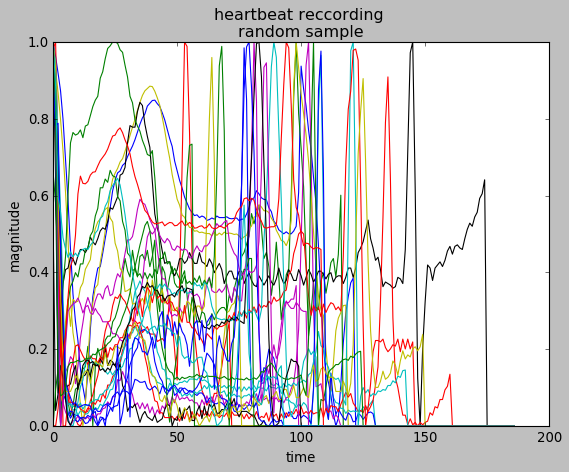

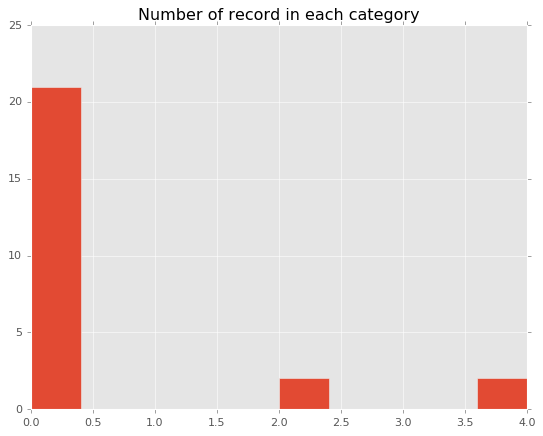

In [5]:
# take a random distribution
sample = mit_test_data.sample(25)

# remove the target column
sampleX = sample.iloc[:,sample.columns != 187]

import matplotlib.pyplot as plt

plt.style.use('classic')

# plt samples
for index, row in sampleX.iterrows():
    plt.plot(np.array(range(0, 187)) ,row)

plt.xlabel("time")
plt.ylabel("magnitude")
plt.title("heartbeat reccording \nrandom sample")

plt.show()

plt.style.use("ggplot")

plt.title("Number of record in each category")

plt.hist(sample.iloc[:,sample.columns == 187].transpose())
plt.show()

In [6]:
# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg' 

In [7]:
mit_train_data.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            178, 179, 180, 181, 182, 183, 184, 185, 186, 187],
           dtype='int64', length=188)

In [8]:
columns = [0,1,2,3,4,5,6,187]

In [9]:
# `pairplot()` may become very slow with the SVG format
#%config InlineBackend.figure_format = 'png'
#sns.pairplot(mit_train_data[columns]);

# How many date we have in each category?

In [10]:
print("Train data")
print("Type\tCount")
print((mit_train_data[187]).value_counts())
print("-------------------------")
print("Test data")
print("Type\tCount")
print((mit_test_data[187]).value_counts())

Train data
Type	Count
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64
-------------------------
Test data
Type	Count
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64


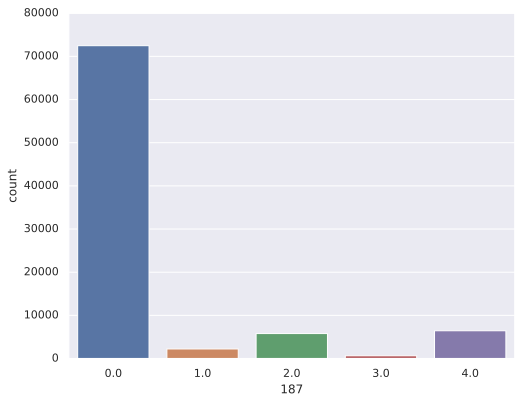

In [11]:
sns.countplot(x=187, data=mit_train_data);

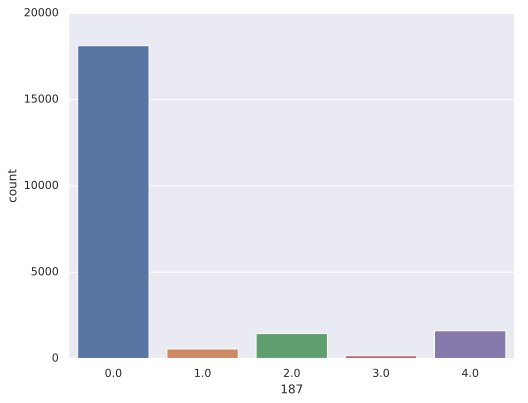

In [12]:
sns.countplot(x=187, data=mit_test_data);

# Separate features and targets

In [13]:
mit_train_data = mit_train_data.sample(frac=1)

In [14]:
from keras.utils import to_categorical

print("--- X ---")
X = mit_train_data.loc[:, mit_train_data.columns != 187]
print(X.head())
print(X.info())

print("--- Y ---")
y = mit_train_data.loc[:, mit_train_data.columns == 187]
y = to_categorical(y)

print("--- testX ---")
testX = mit_test_data.loc[:, mit_test_data.columns != 187]
print(testX.head())
print(testX.info())

print("--- testy ---")
testy = mit_test_data.loc[:, mit_test_data.columns == 187]
testy = to_categorical(testy)

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

--- X ---
            0         1         2         3         4         5         6    \
33421  0.957845  0.824356  0.585480  0.278689  0.131148  0.088993  0.065574   
77229  0.986637  1.000000  0.906459  0.879733  0.821826  0.757238  0.748330   
26898  0.890547  0.731343  0.164179  0.000000  0.069652  0.191542  0.201493   
73035  0.910112  0.820225  0.213483  0.000000  0.063670  0.116105  0.104869   
84436  1.000000  0.935743  0.860442  0.769076  0.650602  0.502008  0.368474   

            7         8         9   ...   177  178  179  180  181  182  183  \
33421  0.039813  0.030445  0.014052 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
77229  0.741648  0.567929  0.342984 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
26898  0.238806  0.223881  0.243781 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
73035  0.164794  0.194757  0.149813 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
84436  0.263052  0.187751  0.130522 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       184  185  186  
33421  0.0  0.0  

# Keras model to make prediction

In [15]:
from keras import backend as K
    
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.
        Only computes a batch-wise average of recall.
        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall
 
    def precision(y_true, y_pred):
        """Precision metric.
        Only computes a batch-wise average of precision.
        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### 训练一个Base Model 确定BaseLine

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation,BatchNormalization,Dropout

model = Sequential()

model.add(Dense(50, input_dim=187, init='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(30, init='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc',f1])

history = model.fit(X, y, validation_split=0.2,epochs=100,shuffle=True,class_weight='auto')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, input_dim=187, activation="relu", kernel_initializer="normal")`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="normal")`
  


Train on 70043 samples, validate on 17511 samples
Epoch 1/100
70043/70043 [==============================] - 12s 171us/step - loss: 0.3824 - acc: 0.8985 - f1: 0.8902 - val_loss: 0.2611 - val_acc: 0.9248 - val_f1: 0.9264
Epoch 2/100
70043/70043 [==============================] - 9s 126us/step - loss: 0.2563 - acc: 0.9290 - f1: 0.9290 - val_loss: 0.1948 - val_acc: 0.9458 - val_f1: 0.9466
Epoch 3/100
70043/70043 [==============================] - 9s 125us/step - loss: 0.2138 - acc: 0.9403 - f1: 0.9405 - val_loss: 0.1819 - val_acc: 0.9452 - val_f1: 0.9461
Epoch 4/100
70043/70043 [==============================] - 9s 125us/step - loss: 0.1938 - acc: 0.9462 - f1: 0.9461 - val_loss: 0.1626 - val_acc: 0.9529 - val_f1: 0.9527
Epoch 5/100
70043/70043 [==============================] - 9s 125us/step - loss: 0.1815 - acc: 0.9488 - f1: 0.9491 - val_loss: 0.1498 - val_acc: 0.9562 - val_f1: 0.9558
Epoch 6/100
70043/70043 [==============================] - 9s 126us/step - loss: 0.1731 - acc: 0.9515 - 

In [17]:
print("Evaluation: ")
mse, acc, F1 = model.evaluate(testX, testy)
print('mean_squared_error :', mse)
print('accuracy:', acc)
print('F1:', F1)

Evaluation: 
21892/21892 [==============================] - 1s 43us/step
mean_squared_error : 0.0982069869983862
accuracy: 0.9740544491138315
F1: 0.9739329756101263


This seems to work pretty well!

Work in progress

In [18]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'val_f1', 'loss', 'acc', 'f1'])

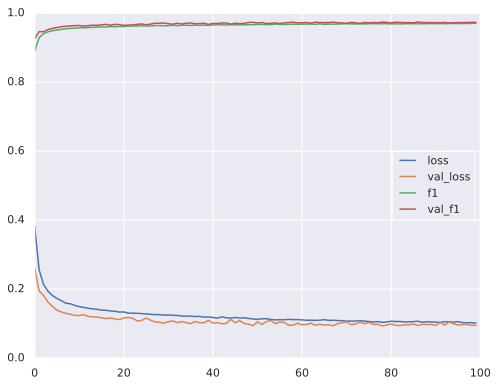

In [19]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['f1'])
plt.plot(history.history['val_f1'])
plt.legend(labels=['loss','val_loss','f1','val_f1'],loc='best')
plt.show()

# 使用CNN进一步优化

In [20]:
X.shape

(87554, 187)

In [21]:
y.shape

(87554, 5)

In [22]:
X = np.expand_dims(X,2)
testX = np.expand_dims(testX,2)

In [23]:
X.shape

(87554, 187, 1)

In [24]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Input, Flatten, SeparableConv1D
from keras.layers import GlobalMaxPooling1D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.models import Model

from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [25]:
n_obs, feature, depth = X.shape
batch_size = 1024

In [26]:
def build_model():
    input_img = Input(shape=(feature, depth), name='ImageInput')
    x = Conv1D(64, 3, activation='relu', padding='same', name='Conv1_1')(input_img)
    x = Conv1D(64, 3, activation='relu', padding='same', name='Conv1_2')(x)
    x = MaxPooling1D(2, name='pool1')(x)
    
    x = SeparableConv1D(64, 3, activation='relu', padding='same', name='Conv2_1')(x)
    x = SeparableConv1D(64, 3, activation='relu', padding='same', name='Conv2_2')(x)
    x = MaxPooling1D(2, name='pool2')(x)
    
    x = SeparableConv1D(128, 3, activation='relu', padding='same', name='Conv3_1')(x)
    x = BatchNormalization(name='bn1')(x)
    x = SeparableConv1D(128, 3, activation='relu', padding='same', name='Conv3_2')(x)
    x = BatchNormalization(name='bn2')(x)
    
    x = SeparableConv1D(256, 3, activation='relu', padding='same', name='Conv3_3')(x)
    x = MaxPooling1D(2, name='pool3')(x)
    x = Dropout(0.6, name='dropout0')(x)
    
    x = Flatten(name='flatten')(x)
    x = Dense(256, activation='relu', name='fc1')(x)
    x = Dropout(0.6, name='dropout1')(x)
    x = Dense(128, activation='relu', name='fc2')(x)
    x = Dropout(0.5, name='dropout2')(x)
    x = Dense(5, activation='softmax', name='fc3')(x)
    
    model = Model(inputs=input_img, outputs=x)
    return model

In [27]:
model =  build_model()
#model.summary()

In [28]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc',f1])

In [29]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath="/tmp/weights.hdf5", verbose=1, save_best_only=True)


In [30]:
history = model.fit(X, y, validation_split=0.2,epochs=75,batch_size=batch_size,shuffle=True,class_weight='auto',callbacks=[checkpointer])

Train on 70043 samples, validate on 17511 samples
Epoch 1/75
70043/70043 [==============================] - 9s 134us/step - loss: 0.6709 - acc: 0.8313 - f1: 0.7598 - val_loss: 1.0940 - val_acc: 0.8285 - val_f1: 0.8284

Epoch 00001: val_loss improved from inf to 1.09404, saving model to /tmp/weights.hdf5
Epoch 2/75
70043/70043 [==============================] - 6s 81us/step - loss: 0.3115 - acc: 0.9099 - f1: 0.9093 - val_loss: 0.2622 - val_acc: 0.9243 - val_f1: 0.9247

Epoch 00002: val_loss improved from 1.09404 to 0.26223, saving model to /tmp/weights.hdf5
Epoch 3/75
70043/70043 [==============================] - 6s 83us/step - loss: 0.2128 - acc: 0.9421 - f1: 0.9420 - val_loss: 0.3245 - val_acc: 0.9147 - val_f1: 0.9150

Epoch 00003: val_loss did not improve from 0.26223
Epoch 4/75
70043/70043 [==============================] - 6s 82us/step - loss: 0.1647 - acc: 0.9560 - f1: 0.9558 - val_loss: 0.1193 - val_acc: 0.9672 - val_f1: 0.9667

Epoch 00004: val_loss improved from 0.26223 to 0.1

In [31]:
print("Evaluation: ")
mse, acc, F1 = model.evaluate(testX, testy)
print('mean_squared_error :', mse)
print('accuracy:', acc)
print('F1:', F1)

Evaluation: 
21892/21892 [==============================] - 2s 90us/step
mean_squared_error : 0.06883900538331693
accuracy: 0.9865247579024301
F1: 0.986597978238887


In [32]:
model.save('cnn-0.985.h5')

In [33]:
y_pred = model.predict(testX, batch_size=1000)

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 

print(classification_report(testy.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18118
           1       0.93      0.79      0.85       556
           2       0.98      0.95      0.96      1448
           3       0.85      0.78      0.82       162
           4       1.00      0.99      0.99      1608

    accuracy                           0.99     21892
   macro avg       0.95      0.90      0.92     21892
weighted avg       0.99      0.99      0.99     21892



Confusion matrix, without normalization


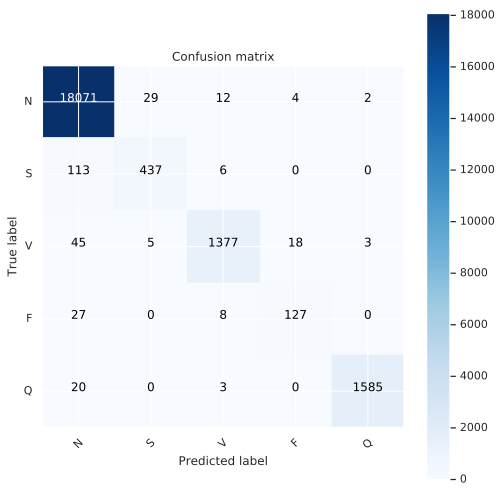

In [35]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(testy.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],
                      title='Confusion matrix')
plt.show()

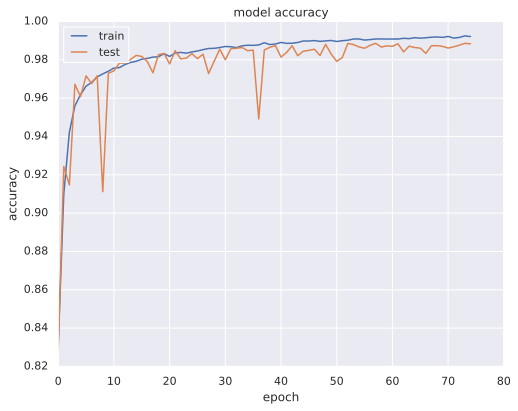

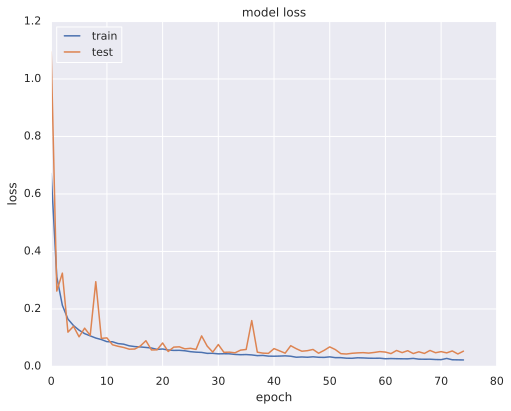

In [36]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 数据增强

In [37]:
#mit_train_data = mit_train_data.sample(frac=1)

In [38]:
from keras.utils import to_categorical

print("--- X ---")
X = mit_train_data.loc[:, mit_train_data.columns != 187]
print(X.head())
print(X.info())

print("--- Y ---")
y = mit_train_data.loc[:, mit_train_data.columns == 187]
#y = to_categorical(y)

print("--- testX ---")
testX = mit_test_data.loc[:, mit_test_data.columns != 187]
print(testX.head())
print(testX.info())

print("--- testy ---")
testy = mit_test_data.loc[:, mit_test_data.columns == 187]
testy = to_categorical(testy)

--- X ---
            0         1         2         3         4         5         6    \
33421  0.957845  0.824356  0.585480  0.278689  0.131148  0.088993  0.065574   
77229  0.986637  1.000000  0.906459  0.879733  0.821826  0.757238  0.748330   
26898  0.890547  0.731343  0.164179  0.000000  0.069652  0.191542  0.201493   
73035  0.910112  0.820225  0.213483  0.000000  0.063670  0.116105  0.104869   
84436  1.000000  0.935743  0.860442  0.769076  0.650602  0.502008  0.368474   

            7         8         9   ...   177  178  179  180  181  182  183  \
33421  0.039813  0.030445  0.014052 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
77229  0.741648  0.567929  0.342984 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
26898  0.238806  0.223881  0.243781 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
73035  0.164794  0.194757  0.149813 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
84436  0.263052  0.187751  0.130522 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       184  185  186  
33421  0.0  0.0  

In [39]:
X.shape,y.shape

((87554, 187), (87554, 1))

In [40]:
y = y.values.squeeze()

In [41]:
X = np.array(X)

In [42]:
C0 = np.argwhere(y == 0).flatten()
C1 = np.argwhere(y == 1).flatten()
C2 = np.argwhere(y == 2).flatten()
C3 = np.argwhere(y == 3).flatten()
C4 = np.argwhere(y == 4).flatten()

In [43]:
print(C0.shape[0],C1.shape[0],C2.shape[0],C3.shape[0],C4.shape[0])

72471 2223 5788 641 6431


> 放大C1 C3 类，C1类放大4倍，C3类放大8倍

In [44]:
import random
from scipy.signal import resample

def stretch(x):
    l = int(187 * (1 + (random.random()-0.5)/3))
    y = resample(x, l)
    if l < 187:
        y_ = np.zeros(shape=(187, ))
        y_[:l] = y
    else:
        y_ = y[:187]
    return y_

def amplify(x):
    alpha = (random.random()-0.5)
    factor = -alpha*x + (1+alpha)
    return x*factor

def augment(x):
    result = np.zeros(shape= (5, 187))
    for i in range(3):
        if random.random() < 0.33:
            new_y = stretch(x)
        elif random.random() < 0.66:
            new_y = amplify(x)
        else:
            new_y = stretch(x)
            new_y = amplify(new_y)
        result[i, :] = new_y
    return result

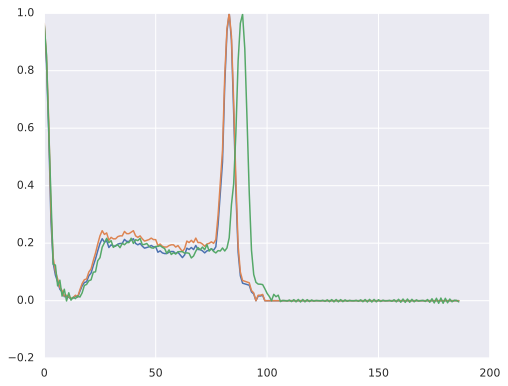

In [45]:
import matplotlib.pyplot as plt
import random
plt.plot(X[0, :])
plt.plot(amplify(X[0, :]))
plt.plot(stretch(X[0, :]))
plt.show()

In [46]:
result_C1 = np.apply_along_axis(augment, axis=1, arr=X[C1]).reshape(-1, 187)
class_C1 = np.ones(shape=(result_C1.shape[0],), dtype=int)*3

result_C3 = np.apply_along_axis(augment, axis=1, arr=X[C3]).reshape(-1, 187)
class_C3 = np.ones(shape=(result_C3.shape[0],), dtype=int)*3

# result_C32 = np.apply_along_axis(augment, axis=1, arr=X[C3]).reshape(-1, 187)
# class_C32 = np.ones(shape=(result_C32.shape[0],), dtype=int)*3

# X = np.vstack([X, result_C1, result_C3])
# y = np.hstack([y, class_C1, class_C3])

X = np.vstack([X,  result_C3])
y = np.hstack([y,  class_C3])

In [47]:
X.shape, y.shape

((90759, 187), (90759,))

In [48]:
y = to_categorical(y)

In [49]:
from sklearn.utils import shuffle
X, y = shuffle(X,y,random_state=0)

## Try a network by using augmented data

In [50]:
X = np.expand_dims(X,2)
testX = np.expand_dims(testX,2)

In [51]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Input, Flatten, SeparableConv1D
from keras.layers import GlobalMaxPooling1D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.models import Model

from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

n_obs, feature, depth = X.shape
batch_size = 1024

In [52]:
def build_model():
    input_img = Input(shape=(feature, depth), name='ImageInput')
    x = Conv1D(64, 3, activation='relu', padding='same', name='Conv1_1')(input_img)
    x = Conv1D(64, 3, activation='relu', padding='same', name='Conv1_2')(x)
    x = MaxPooling1D(2, name='pool1')(x)
    
    x = SeparableConv1D(128, 3, activation='relu', padding='same', name='Conv2_1')(x)
    x = SeparableConv1D(128, 3, activation='relu', padding='same', name='Conv2_2')(x)
    x = MaxPooling1D(2, name='pool2')(x)
    
    x = SeparableConv1D(256, 3, activation='relu', padding='same', name='Conv3_1')(x)
    x = BatchNormalization(name='bn1')(x)
    x = SeparableConv1D(256, 3, activation='relu', padding='same', name='Conv3_2')(x)
    x = BatchNormalization(name='bn2')(x)
    x = Dropout(0.3, name='dropout3-2')(x)
    
    x = SeparableConv1D(512, 3, activation='relu', padding='same', name='Conv3_3')(x)
    x = MaxPooling1D(2, name='pool3')(x)
    x = Dropout(0.3, name='dropout3-3')(x)
    
    x = Flatten(name='flatten')(x)
    x = Dense(512, activation='relu', name='fc1')(x)
    x = Dropout(0.6, name='dropout1')(x)
    x = Dense(256, activation='relu', name='fc2')(x)
    x = Dropout(0.5, name='dropout2')(x)
    x = Dense(5, activation='softmax', name='fc3')(x)
    
    model = Model(inputs=input_img, outputs=x)
    return model

In [53]:
model =  build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ImageInput (InputLayer)      (None, 187, 1)            0         
_________________________________________________________________
Conv1_1 (Conv1D)             (None, 187, 64)           256       
_________________________________________________________________
Conv1_2 (Conv1D)             (None, 187, 64)           12352     
_________________________________________________________________
pool1 (MaxPooling1D)         (None, 93, 64)            0         
_________________________________________________________________
Conv2_1 (SeparableConv1D)    (None, 93, 128)           8512      
_________________________________________________________________
Conv2_2 (SeparableConv1D)    (None, 93, 128)           16896     
_________________________________________________________________
pool2 (MaxPooling1D)         (None, 46, 128)           0         
__________

In [54]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc',f1])

In [55]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath="/tmp/weights-aug.hdf5", monitor='val_f1', mode='max', verbose=1, save_best_only=True)

In [56]:
history = model.fit(X, y, validation_split=0.2,epochs=75,batch_size=batch_size*2,class_weight='auto',callbacks=[checkpointer])

Train on 72607 samples, validate on 18152 samples
Epoch 1/75
72607/72607 [==============================] - 11s 156us/step - loss: 0.9059 - acc: 0.7828 - f1: 0.6818 - val_loss: 0.7918 - val_acc: 0.7964 - val_f1: 0.7964

Epoch 00001: val_f1 improved from -inf to 0.79644, saving model to /tmp/weights-aug.hdf5
Epoch 2/75
72607/72607 [==============================] - 8s 107us/step - loss: 0.6155 - acc: 0.8217 - f1: 0.8206 - val_loss: 0.7298 - val_acc: 0.8244 - val_f1: 0.8241

Epoch 00002: val_f1 improved from 0.79644 to 0.82412, saving model to /tmp/weights-aug.hdf5
Epoch 3/75
72607/72607 [==============================] - 8s 106us/step - loss: 0.3497 - acc: 0.8913 - f1: 0.8904 - val_loss: 0.3003 - val_acc: 0.9061 - val_f1: 0.9104

Epoch 00003: val_f1 improved from 0.82412 to 0.91043, saving model to /tmp/weights-aug.hdf5
Epoch 4/75
72607/72607 [==============================] - 8s 107us/step - loss: 0.2441 - acc: 0.9290 - f1: 0.9292 - val_loss: 2.2269 - val_acc: 0.7965 - val_f1: 0.7966



In [57]:
model.load_weights('/tmp/weights-aug.hdf5')

In [58]:
print("Evaluation: ")
mse, acc, F1 = model.evaluate(testX, testy)
print('mean_squared_error :', mse)
print('accuracy:', acc)
print('F1:', F1)

Evaluation: 
21892/21892 [==============================] - 2s 99us/step
mean_squared_error : 0.06065768600171336
accuracy: 0.9857938973140873
F1: 0.9859417975983497


In [59]:
K.set_value(model.optimizer.lr, 1e-4)
model.fit(X, y, validation_split=0.2,epochs=30,batch_size=batch_size*2,class_weight='auto',callbacks=[checkpointer])

Train on 72607 samples, validate on 18152 samples
Epoch 1/30
72607/72607 [==============================] - 8s 106us/step - loss: 0.0225 - acc: 0.9920 - f1: 0.9921 - val_loss: 14.0999 - val_acc: 0.0541 - val_f1: 0.0541

Epoch 00001: val_f1 did not improve from 0.98870
Epoch 2/30
72607/72607 [==============================] - 8s 106us/step - loss: 0.0209 - acc: 0.9928 - f1: 0.9927 - val_loss: 10.0269 - val_acc: 0.1133 - val_f1: 0.1131

Epoch 00002: val_f1 did not improve from 0.98870
Epoch 3/30
72607/72607 [==============================] - 8s 106us/step - loss: 0.0209 - acc: 0.9924 - f1: 0.9925 - val_loss: 4.2838 - val_acc: 0.3889 - val_f1: 0.3886

Epoch 00003: val_f1 did not improve from 0.98870
Epoch 4/30
72607/72607 [==============================] - 8s 106us/step - loss: 0.0187 - acc: 0.9936 - f1: 0.9935 - val_loss: 1.7304 - val_acc: 0.6701 - val_f1: 0.6698

Epoch 00004: val_f1 did not improve from 0.98870
Epoch 5/30
72607/72607 [==============================] - 8s 106us/step - lo

## Change LR train more

In [60]:
K.set_value(model.optimizer.lr, 1e-5)
model.fit(X, y, validation_split=0.2,epochs=30,batch_size=batch_size,class_weight='auto',callbacks=[checkpointer])

Train on 72607 samples, validate on 18152 samples
Epoch 1/30
72607/72607 [==============================] - 8s 115us/step - loss: 0.0152 - acc: 0.9946 - f1: 0.9946 - val_loss: 0.0465 - val_acc: 0.9894 - val_f1: 0.9893

Epoch 00001: val_f1 did not improve from 0.99008
Epoch 2/30
72607/72607 [==============================] - 8s 112us/step - loss: 0.0144 - acc: 0.9950 - f1: 0.9950 - val_loss: 0.0453 - val_acc: 0.9893 - val_f1: 0.9893

Epoch 00002: val_f1 did not improve from 0.99008
Epoch 3/30
72607/72607 [==============================] - 8s 112us/step - loss: 0.0153 - acc: 0.9944 - f1: 0.9944 - val_loss: 0.0457 - val_acc: 0.9893 - val_f1: 0.9894

Epoch 00003: val_f1 did not improve from 0.99008
Epoch 4/30
72607/72607 [==============================] - 8s 112us/step - loss: 0.0135 - acc: 0.9950 - f1: 0.9950 - val_loss: 0.0450 - val_acc: 0.9896 - val_f1: 0.9898

Epoch 00004: val_f1 did not improve from 0.99008
Epoch 5/30
72607/72607 [==============================] - 8s 112us/step - loss

In [61]:
model.load_weights('/tmp/weights-aug.hdf5')
print("Evaluation: ")
mse, acc, F1 = model.evaluate(testX, testy)
print('mean_squared_error :', mse)
print('accuracy:', acc)
print('F1:', F1)

Evaluation: 
21892/21892 [==============================] - 2s 95us/step
mean_squared_error : 0.07225318801659861
accuracy: 0.9867531518362872
F1: 0.9868423225630055


In [62]:
y_pred = model.predict(testX, batch_size=1000)

Confusion matrix, without normalization


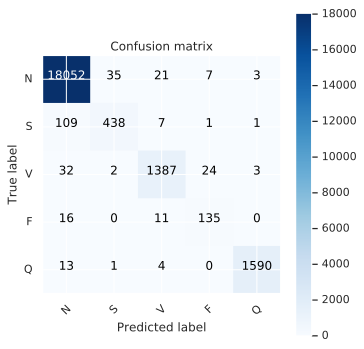

In [63]:
import itertools
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(testy.argmax(axis=1), y_pred.argmax(axis=1))
#np.set_printoptions(precision=0)

# Plot non-normalized confusion matrix
plt.figure(figsize=(5, 5))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],
                      title='Confusion matrix')
plt.show()

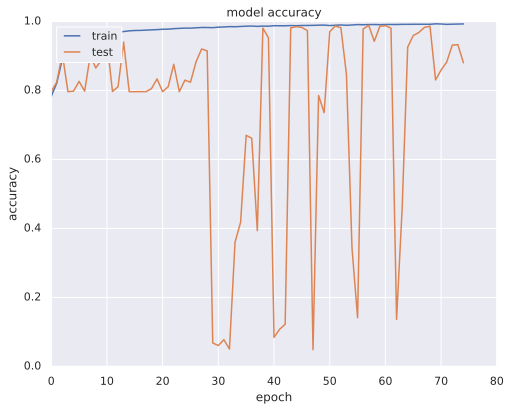

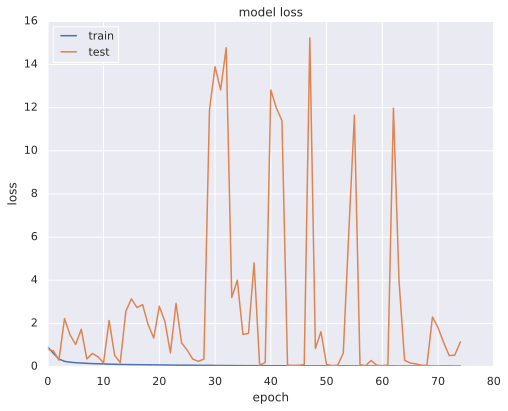

In [64]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## The last Step: Using all the training data and fitting more epochs

In [65]:
#K.set_value(model.optimizer.lr, 1e-3)
history = model.fit(X, y, validation_data=(testX,testy),epochs=150,batch_size=batch_size*2,class_weight='auto',callbacks=[checkpointer])

Train on 90759 samples, validate on 21892 samples
Epoch 1/150
90759/90759 [==============================] - 10s 109us/step - loss: 0.0248 - acc: 0.9930 - f1: 0.9930 - val_loss: 0.0712 - val_acc: 0.9868 - val_f1: 0.9868

Epoch 00001: val_f1 did not improve from 0.99014
Epoch 2/150
90759/90759 [==============================] - 10s 106us/step - loss: 0.0237 - acc: 0.9931 - f1: 0.9931 - val_loss: 0.0704 - val_acc: 0.9868 - val_f1: 0.9870

Epoch 00002: val_f1 did not improve from 0.99014
Epoch 3/150
90759/90759 [==============================] - 10s 106us/step - loss: 0.0230 - acc: 0.9929 - f1: 0.9930 - val_loss: 0.0699 - val_acc: 0.9869 - val_f1: 0.9870

Epoch 00003: val_f1 did not improve from 0.99014
Epoch 4/150
90759/90759 [==============================] - 10s 106us/step - loss: 0.0244 - acc: 0.9930 - f1: 0.9930 - val_loss: 0.0692 - val_acc: 0.9869 - val_f1: 0.9870

Epoch 00004: val_f1 did not improve from 0.99014
Epoch 5/150
90759/90759 [==============================] - 10s 106us/s

In [66]:
model.load_weights('/tmp/weights-aug.hdf5')

In [67]:
K.set_value(model.optimizer.lr, 1e-5)
history = model.fit(X, y, validation_data=(testX,testy),epochs=30,batch_size=batch_size*2,class_weight='auto',callbacks=[checkpointer])

Train on 90759 samples, validate on 21892 samples
Epoch 1/30
90759/90759 [==============================] - 10s 106us/step - loss: 0.0239 - acc: 0.9930 - f1: 0.9930 - val_loss: 0.1066 - val_acc: 0.9745 - val_f1: 0.9747

Epoch 00001: val_f1 did not improve from 0.99014
Epoch 2/30
90759/90759 [==============================] - 10s 106us/step - loss: 0.0238 - acc: 0.9930 - f1: 0.9931 - val_loss: 0.0785 - val_acc: 0.9831 - val_f1: 0.9832

Epoch 00002: val_f1 did not improve from 0.99014
Epoch 3/30
90759/90759 [==============================] - 10s 106us/step - loss: 0.0240 - acc: 0.9931 - f1: 0.9931 - val_loss: 0.0699 - val_acc: 0.9866 - val_f1: 0.9867

Epoch 00003: val_f1 did not improve from 0.99014
Epoch 4/30
90759/90759 [==============================] - 10s 106us/step - loss: 0.0239 - acc: 0.9931 - f1: 0.9931 - val_loss: 0.0696 - val_acc: 0.9871 - val_f1: 0.9871

Epoch 00004: val_f1 did not improve from 0.99014
Epoch 5/30
90759/90759 [==============================] - 10s 106us/step -

In [68]:
model.load_weights('/tmp/weights-aug.hdf5')
print("Evaluation: ")
mse, acc, F1 = model.evaluate(testX, testy)
print('mean_squared_error :', mse)
print('accuracy:', acc)
print('F1:', F1)

Evaluation: 
21892/21892 [==============================] - 2s 94us/step
mean_squared_error : 0.07225318801659861
accuracy: 0.9867531518362872
F1: 0.9868423225630055


In [69]:
model.save("0.98887.hdf5")

In [70]:
K.set_value(model.optimizer.lr, 1e-7)
history = model.fit(X, y, validation_data=(testX,testy),epochs=30,batch_size=batch_size*2,class_weight='auto',callbacks=[checkpointer])

Train on 90759 samples, validate on 21892 samples
Epoch 1/30
90759/90759 [==============================] - 10s 106us/step - loss: 0.0229 - acc: 0.9933 - f1: 0.9933 - val_loss: 0.0753 - val_acc: 0.9869 - val_f1: 0.9869

Epoch 00001: val_f1 did not improve from 0.99014
Epoch 2/30
90759/90759 [==============================] - 10s 106us/step - loss: 0.0244 - acc: 0.9930 - f1: 0.9929 - val_loss: 0.0743 - val_acc: 0.9868 - val_f1: 0.9868

Epoch 00002: val_f1 did not improve from 0.99014
Epoch 3/30
90759/90759 [==============================] - 10s 106us/step - loss: 0.0241 - acc: 0.9930 - f1: 0.9930 - val_loss: 0.0738 - val_acc: 0.9867 - val_f1: 0.9869

Epoch 00003: val_f1 did not improve from 0.99014
Epoch 4/30
90759/90759 [==============================] - 10s 106us/step - loss: 0.0239 - acc: 0.9928 - f1: 0.9929 - val_loss: 0.0734 - val_acc: 0.9868 - val_f1: 0.9868

Epoch 00004: val_f1 did not improve from 0.99014
Epoch 5/30
90759/90759 [==============================] - 10s 106us/step -

Confusion matrix, without normalization


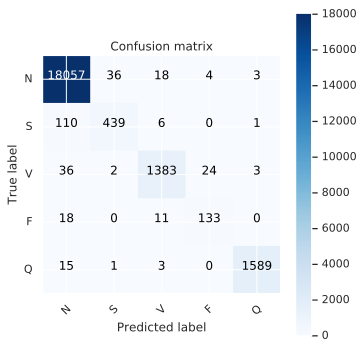

In [71]:
y_pred = model.predict(testX, batch_size=1000)
# Compute confusion matrix
cnf_matrix = confusion_matrix(testy.argmax(axis=1), y_pred.argmax(axis=1))
#np.set_printoptions(precision=0)

# Plot non-normalized confusion matrix
plt.figure(figsize=(5, 5))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],
                      title='Confusion matrix')
plt.show()